In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from kneed import KneeLocator
import matplotlib.pyplot as plt
import numpy as np

In [3]:
image = plt.imread('china-original.png')
shape = image.shape

In [4]:
limage = image.reshape((-1,3))

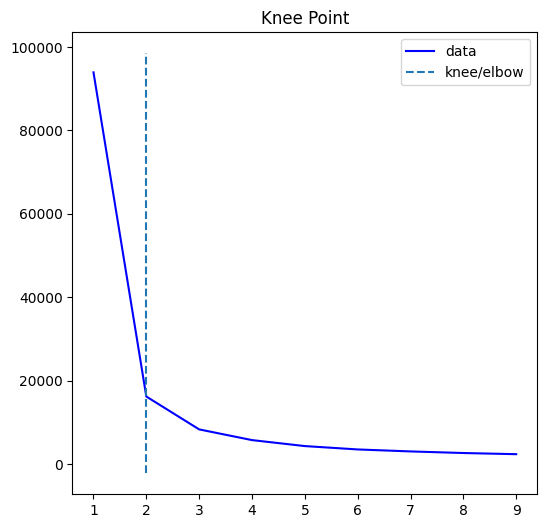

In [5]:
kl = KneeLocator(list(range(1,10)), [KMeans(i, n_init='auto').fit(limage).inertia_ for i in range(1, 10)], curve='convex', direction='decreasing')
kl.plot_knee()

Kneed suggests k = 2 but practically k = 3 is better

In [6]:
kmeans = KMeans(3,n_init='auto').fit(limage)
predictions = kmeans.cluster_centers_[kmeans.labels_]
cimage = predictions.reshape(shape)

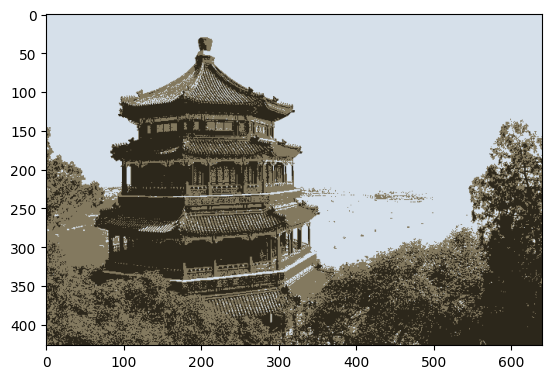

In [7]:
plt.imshow(cimage)